In [1]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time # for timing processes
import random # for generating random values

In [2]:
def take_first(my_list):
    return my_list[0]

In [3]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [4]:
constant_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = take_first(lst)
    toc = time.process_time()

    constant_times.append(toc-tic)

In [5]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['n', 'time'])
constant_df

,n,time
0,10,0.000004
1,100,0.000002
2,1000,0.000001
3,10000,0.000002
4,100000,0.000005
5,1000000,0.000701
6,10000000,0.000010


In [6]:
def find_max(my_list):
    max_value = my_list[0]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
    return max_value

In [10]:
short_list = [3,4,5,2,22,4,3,5,0]
tic = time.process_time()
largest = find_max(short_list)
toc = time.process_time()

In [11]:
toc-tic

8.186200000004362e-05

In [12]:
long_list = [42] * 10**8 # one hundred million items

In [13]:
tic = time.process_time()
largest = find_max(long_list)
toc = time.process_time()

In [14]:
toc - tic

8.508824251

In [15]:
linear_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = find_max(lst)
    toc = time.process_time()

    linear_times.append(toc-tic)

In [16]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['n', 'time'])
linear_df

,n,time
0,10,0.000009
1,100,0.000014
2,1000,0.000135
3,10000,0.001354
4,100000,0.014541
5,1000000,0.169444
6,10000000,1.023831


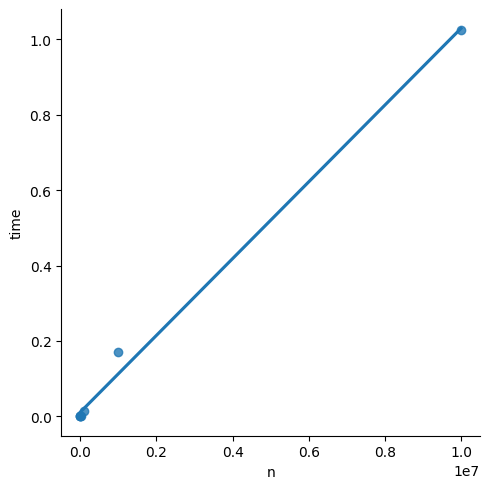

In [17]:
_ = sns.lmplot(x='n', y='time', data=linear_df, ci=None) # linear model (regression) plot

In [18]:
def element_multiplier(my_list):
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

In [19]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [21]:
# compute time gets annoyingly long from list_lengths[5] onward
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths.sort()
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [22]:
poly_times = []

for l in granular_list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = element_multiplier(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

In [23]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['n', 'time'])
poly_df

,n,time
0,10,0.000029
1,50,0.000466
2,100,0.001647
3,500,0.043827
4,1000,0.218761
5,5000,2.576822
6,10000,11.480453


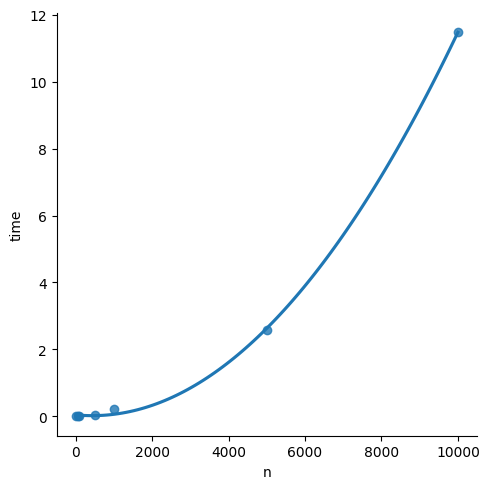

In [24]:
_ = sns.lmplot(x='n', y='time', data=poly_df, ci=None, order=2)

LIST

In [25]:
t = [25, 2, 5]

In [26]:
t/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [27]:
x = np.array([25, 2, 5])
x/2

array([12.5,  1. ,  2.5])

In [28]:
y = torch.tensor([[25, 2, 5], [26, 1, 4]])
y/2

tensor([[12.5000,  1.0000,  2.5000],
        [13.0000,  0.5000,  2.0000]])

In [29]:
z = tf.Variable([[[0, 1], [2, 3]], [[25, 26], [7, 9]]], dtype=tf.float16)
z/2

<tf.Tensor: shape=(2, 2, 2), dtype=float16, numpy=
array([[[ 0. ,  0.5],
        [ 1. ,  1.5]],

       [[12.5, 13. ],
        [ 3.5,  4.5]]], dtype=float16)>

In [30]:
np.append(x, 26)

array([25,  2,  5, 26])

Arrays in Python are also typically extensible by default.

Note that it's very efficient (O(1)) to append items to end of list...  

..but time inefficient to add at start or middle of long list as later items will need to be shifted to later in list. Worst case is insert at beginning of list, which has O($n$) complexity.

Note that as well as appending, accessing an array element by index or finding the array's length are O(1).

STACK

In [31]:
s = []
s.append('five_of_diamonds')
s.append('queen_of_hearts')
s.append('ace_of_spades')

In [32]:
s.pop()

'ace_of_spades'

SEARCHING AND SORTING

#### Binary Search

Let's say we have an array, `b`:

In [33]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

Under normal circumstances, the only way to search for a value (e.g., `25`) is to search element by element. In the worse-case, this has O($n$) time complexity (e.g., if we were to search `b` for `25` from its end).

If `b` already happens to be sorted, however...

In [34]:
b.sort() # FYI: uses quick sort
b

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

...we can use the **binary search** algorithm, which has O(log $n$) time complexity:

* Start at the midpoint (`b` is nine elements long, so midpoint is 5th: `14`).
* Since `25` is larger than `14`, we need only search the top half of `b`...
* So we find the midpoint between the 5th element and the 9th, which is the 7th, and which happens to be `25`.
* Done! And in only two steps instead of seven (if we were to search elementwise from first onward).
* If we were searching for `22`, then our next search would be halfway between 5th and 7th elements, which is 6th element and voilà!
* With our nine-element array, worst case is four steps (for `1` or `101`) to find any value (or determine value *isn't* in array).

(Note: called *binary* because at each step we either search upward or downward.)

Doubling $n$ results in only one extra step in worst case:
* One step with array of length 1($= 2^0$)
* Two steps with length 2($= 2^1$) up to length 3
* Three steps with $n = 4 (= 2^2$) up to $n = 7$
* Four steps with $n = 8 (= 2^3$) up to $n = 15$
* Five steps with $n = 16 (= 2^4$) up to $n = 31$

Hence O(log $n$) where, as is typical in CS, we use $\text{log}_2$ (because of binary bits and frequently doubling/halving quantities). E.g.:

In [35]:
np.log2(4) + 1

3.0

In [36]:
np.log2(8) + 1

4.0

In [37]:
np.log2(16) + 1

5.0

Recall that we retain only the dominant term, so O(log $n$ + 1) becomes O(log $n$).

Here's an implementation of binary search, for your reference, that *iterates* over binary search steps with a `while` loop:

In [38]:
def binary_search(array, value):

    low = 0
    high = len(array)-1

    while low <= high:
        midpoint = (low + high) // 2 # rounds down to nearest integer after division
        if value < array[midpoint]:
            high = midpoint-1
        elif value > array[midpoint]:
            low = midpoint+1
        else:
            return midpoint
    return -1

In [39]:
binary_search(b, 25)

6

In [40]:
binary_search(b, 255)

-1

Alternatively, you could implement binary search with *recursion* instead of iteration:

In [41]:
def recursive_binary_search(array, value, low, high):

    if low <= high:

        midpoint = (low + high) // 2

        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)
        else:
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1

In [42]:
recursive_binary_search(b, 25, 0, len(b)-1)

6

In [43]:
recursive_binary_search(b, 255, 0, len(b)-1)

-1

#### Bubble Sort

Binary search required a sorted list. To sort a list (e.g., from smallest to largest value), the most naïve (and computationally complex) approach would be to compare every given element with all other elements.

A common naïve implementation is the **bubble sort**, which allows the largest values to gradually "bubble up" toward the "top" (typically the end) of the array:

In [44]:
def bubble_sort(array):

    n = len(array)

    for i in range(n-1):
        for j in range(0, n-1): # could be n-i-1 as, e.g., top value is guaranteed to have bubbled up in 1st iteration
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]

    return array

In [45]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

In [46]:
bubble_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

* During each iteration, we make $n-1$ comparisons
* A total of $n-1$ iterations need to be made

$$ (n-1)(n-1) = n^2 -2n + 1 $$

Since we drop all terms but the dominant one, this leaves us with polynomial O($n^2$) time complexity for the worst case and the average case. (For more clever implementations, best case is O($n$) because array would already be sorted.)

In contrast, as is typical in algos, there is a time- vs memory-complexity trade-off: Memory complexity is constant, O(1).

In [47]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [48]:
max(granular_list_lengths)

10000

In [49]:
random.sample(range(0, max(granular_list_lengths)), 5) # samples 5 integers w/o replacement from uniform distribution

[7425, 551, 6810, 4895, 4822]

In [50]:
bubble_times = []

for l in granular_list_lengths[0:7]:
    lst = random.sample(range(0, max(granular_list_lengths)), l)

    tic = time.process_time()
    x = bubble_sort(lst)
    toc = time.process_time()

    bubble_times.append(toc-tic)

In [51]:
bubble_df = pd.DataFrame(list(zip(granular_list_lengths, bubble_times)), columns=['n', 'time'])
bubble_df

,n,time
0,10,0.000029
1,50,0.000519
2,100,0.002086
3,500,0.036953
4,1000,0.145596
5,5000,3.936637
6,10000,19.682549


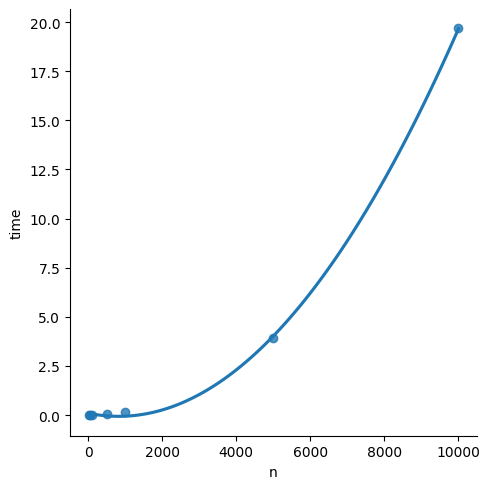

In [52]:
_ = sns.lmplot(x='n', y='time', data=bubble_df, ci=None, order=2)

#### Merge Sort

* General idea is to "divide and conquer"; specifically:
    1. Halve the array into smaller arrays
    2. Sort the smaller arrays
    3. Merge them back into full array
* The above steps are carried out recursively so ultimately sort arrays of max length 2, then merge back up to full length.

In [53]:
def merge_sort(my_list): # using list instead of array so we can .pop() (np arrays don't pop with built-in method)

    if len(my_list) > 1: # if length is 1, no need to sort (at deepest recursion, some will have len 1, others len 2)

        # 1. Halve:
        midpoint = len(my_list) // 2 # Note: This is ~O(log n) behavior
        left_half = my_list[:midpoint]
        right_half = my_list[midpoint:]

        # 2. Sort (recursively):
        left_half = merge_sort(left_half)
        right_half = merge_sort(right_half)

        my_list = []

        # 3. Merge:
        while len(left_half)>0 and len(right_half)>0: # Note: This inner loop exhibits ~O(n) behavior

            if left_half[0] < right_half[0]:
                my_list.append(left_half.pop(0)) # pop first element

            else: # 1st element of right half < 1st element of left
                my_list.append(right_half.pop(0))

        # If any elements remain from either half, they must be the largest value:
        for i in left_half:
            my_list.append(i)
        for i in right_half:
            my_list.append(i)

    return my_list

In [54]:
m = [25, 2, 5, 14, 22, 11, 96, 1, 101]

In [55]:
merge_sort(m)

[1, 2, 5, 11, 14, 22, 25, 96, 101]

Because of the O($n$) loop performing comparisons inside of the function halving list sizes (which we'll need to call O(log $n$) times), merge sort time complexity is the product, i.e., O($n$ log $n$).

In [56]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [57]:
ext_granular_lengths = granular_list_lengths + [50000, 100000] # extended
ext_granular_lengths

[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [58]:
merge_times = []

for l in ext_granular_lengths:
    lst = random.sample(range(0, max(ext_granular_lengths)), l)

    tic = time.process_time()
    x = merge_sort(lst)
    toc = time.process_time()

    merge_times.append(toc-tic)

In [59]:
merge_df = pd.DataFrame(list(zip(ext_granular_lengths, merge_times)), columns=['n', 'time'])
merge_df

,n,time
0,10,0.000039
1,50,0.000236
2,100,0.000471
3,500,0.003073
4,1000,0.004273
5,5000,0.021808
6,10000,0.056842
7,50000,0.465609
8,100000,1.415225


On local laptop, $n=10000$ took ~0.05s with merge sort compared to ~10.5s with bubble sort: a ~200x speedup.

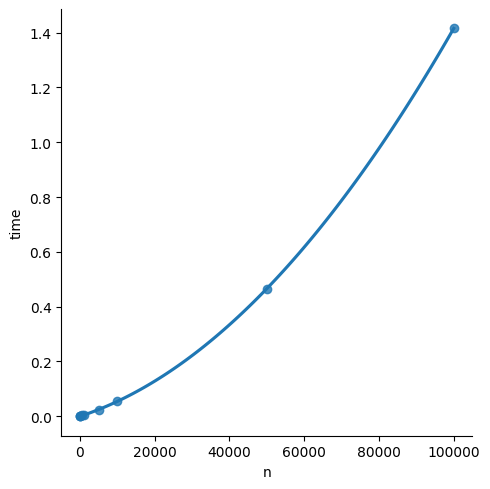

In [60]:
_ = sns.lmplot(x='n', y='time', data=merge_df, ci=None, order=2)

In contrast, while memory complexity for bubble sort was O(1) because we were sorting "in place" (not storing any values in memory), memory complexity is O($n$) for merge sort.

(We need at least two array copies (2$n$) for the most space-efficient merge sort implementations, but we drop constants so this becomes O($n$). Our recursive merge sort implementation would require more as it stores several copies in memory; one more copy of size $n$ would be used for every time the array length doubles (log $n$) resulting in O($n$ log $n$) memory complexity.)

#### Quick Sort

Under many common conditions, the aptly-named **quick sort** is at least as time-efficient as merge sort while also being more space-efficient.

Like merge sort, quick sort uses the "divide and conquer" principle:
1. Pick a *pivot* point (often the final element, though it could be any element, e.g., first, random, median)
2. Move pivot within array such that all elements above pivot are larger (though randomly ordered) and all elements below pivot are smaller (though likewise randomly ordered)
    * Movement occurs element-by-element (and "in place", thus retaining O(1) memory complexity)
3. Recursively, perform quick sort both below and above pivot

In [61]:
def quick_sort(array):
    _quick_sort(array, 0, len(array)-1) # to start, low is index of first element in array; high is penultimate
    return array

In [62]:
def _quick_sort(array, low, high):

    if low < high: # when low reaches high, we know all elements in array must be in order

        # Result of 2.: Element at "partitioning index" has been pivoted to its correct position
        p_index = partition(array, low, high)

        # 3. Recursively sort the elements below the partitioning index...
        _quick_sort(array, low, p_index-1)
        # ...and, separately, above the partitioning index:
        _quick_sort(array, p_index+1, high)

    return array

In [63]:
def partition(array, low, high):

    # 1. Use the final element as the pivot:
    pivot = array[high]

    i = (low-1) # index of element on small side
    for j in range(low, high): # like a bubble swap, we compare pivot to all elements between low and high
        if array[j] < pivot: # if value < pivot, it's correctly on left so increment the smaller element's index...
            i = i+1
            array[i], array[j] = array[j], array[i]
    array[i+1], array[high] = array[high], array[i+1] # ...otherwise, swap greater value to right of pivot (now what we want)
    return(i+1) # return index of correctly positioned pivot

In [64]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])

In [65]:
quick_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

In [66]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [67]:
list_lengths[:6]

[10, 100, 1000, 10000, 100000, 1000000]

In [68]:
quick_times = []

for l in list_lengths[:6]:
    lst = random.sample(range(0, max(list_lengths[:6])), l)

    tic = time.process_time()
    x = quick_sort(lst)
    toc = time.process_time()

    quick_times.append(toc-tic)

In [69]:
quick_df = pd.DataFrame(list(zip(list_lengths[:6], quick_times)), columns=['n', 'time'])
quick_df

,n,time
0,10,0.000028
1,100,0.000246
2,1000,0.003202
3,10000,0.033207
4,100000,0.391089
5,1000000,5.640701


At $n=$ 10k, about a 2x speed-up relative to merge sort (so ~400 relative to bubble sort).

At $n=$ 100k, about a 5x speed-up relative to merge sort.

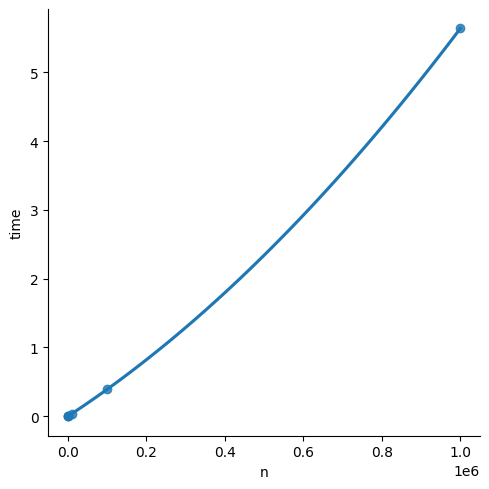

In [70]:
_ = sns.lmplot(x='n', y='time', data=quick_df, ci=None, order=2)

**Average-case time**: The efficiency of quick sort comes from moving lower-valued pivots toward the front (ideally to the midpoint) of the array then "dividing and conquering" on either side of the pivot. In which case (the average case), quick sort behaves like a merge sort (thereby it has O($n$ log $n$) time complexity), but in a manner that requires only a single copy of the array in memory.

**Worst-case time**: With the pivot starting at the final element, if the array is already sorted, this is the worst case. There will be as many calls to `quick_sort()` as there are elements in the array (i.e., $n$ calls) and quick sort will perform a full round of bubble sorting (as per the `for j in range` loop) during each of those (i.e., $n-1$ comparisons); the product of these resulting in O($n^2$) time complexity. So, don't use quick sort if the array is nearly in order!

**Best-case time**: If all values in the array are equal, quick sort will scan over them all once to confirm this, in which case it has O($n$) time complexity. The more values that are equal in the array, the closer to O($n$) performance will be.

Those are the most frequently covered sorting algos. They're relatively straightforward to implement and illustrate time/space complexity trade-offs clearly. There are, however, many more ways to sort, with pros and cons related to time/space complexity as well as implementation difficulty. See the [Big O Cheat Sheet here](https://www.bigocheatsheet.com).